# Linear approximation

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
from sympy import poly
from sympy.abc import k

### y = kx

In [2]:
# Input data
x = np.arange(10).astype(np.float)
y = x + .5 * np.random.randn(10)

In [6]:
%%timeit

# Сalculation polynom
terms = y**2 - 2*y*k*x + k**2*x**2

# Сalculation arg_min
pol_sp = ' + '.join(map(str, terms))
opt_pol_sp = poly(pol_sp)
coeffs_sp = opt_pol_sp.coeffs()
argmin_sp = (-coeffs_sp[1]) / (2 * coeffs_sp[0])

8.16 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%%timeit

# Сalculation polynom
terms = y**2 - 2*y*k*x + k**2*x**2

# Сalculation arg_min
pol_np = ' + '.join(map(str, terms))
all_terms = re.split(r'[\ +-]+', pol_np)
for i in range(2, len(all_terms), 3):
    all_terms[i] = '-' + all_terms[i]

coeffs_np = [0, 0, 0]
for i in range(0, len(all_terms), 3):
    coeffs_np[2] += float(all_terms[i])
for i in range(1, len(all_terms), 3):
    coeffs_np[0] += float(all_terms[i][:-5])
for i in range(2, len(all_terms), 3):
    coeffs_np[1] += float(all_terms[i][:-2])

argmin_np = (-coeffs_np[1]) / (2 * coeffs_np[0])

4.63 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


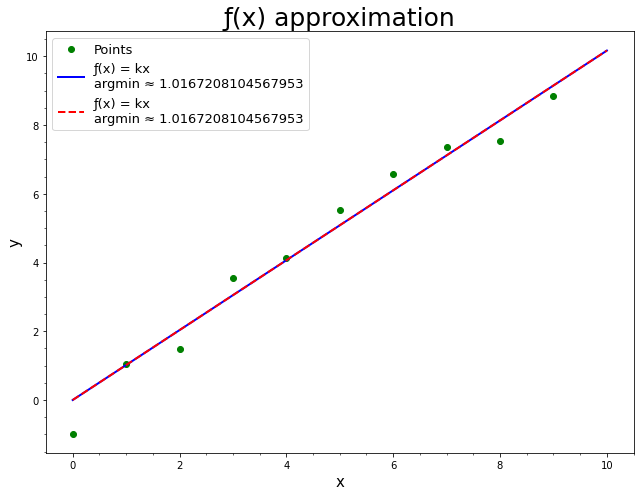

In [5]:
fig, _ = plt.subplots(figsize=(9, 7))
plt.plot(x, y, 'go', label='Points')
x_n = np.linspace(0, 10, 10)
y_n = argmin_sp * x_n
plt.plot(x_n, y_n, 'b-', label=f'ƒ(x) = kx\nargmin ≈ {float(argmin_sp)}', linewidth=2)
y_n = argmin_np * x_n
plt.plot(x_n, y_n, 'r--', label=f'ƒ(x) = kx\nargmin ≈ {float(argmin_np)}', linewidth=2)

plt.title('ƒ(x) approximation', fontsize=25)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.minorticks_on()
plt.legend(loc='best', fontsize=13)
fig.tight_layout()
plt.show()